In [1]:
import os
import pandas as pd
import torch
import torchvision.transforms as op
import matplotlib.pyplot as plt
from torch.utils.data import random_split, Dataset
from PIL import Image

In [2]:
class GalaxyJungle(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return (self.img_labels).shape[0]

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, str(self.img_labels.iloc[idx, 0])) + '.jpg'
        image = Image.open(img_path)
        label = self.img_labels.iloc[idx, 1:]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label, self.img_labels.iloc[idx, 0]

In [3]:
transfs = op.ToTensor()
DS = GalaxyJungle('../data/training/training_solutions_rev1.csv', '../data/training/', transfs)

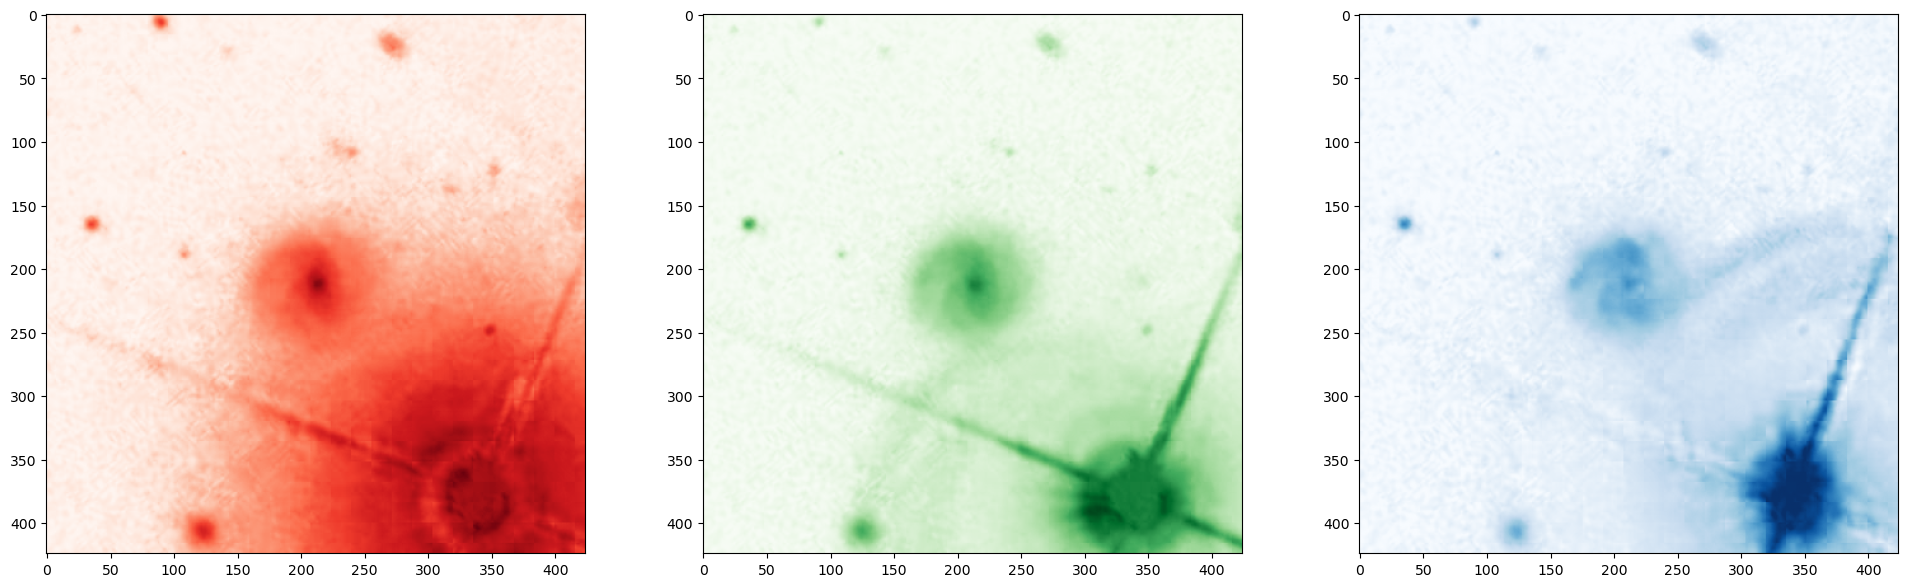

In [4]:
img, lab, indx = DS.__getitem__(234)

fig, ax = plt.subplots(1,3, figsize=(24,7))
color = ['Reds', 'Greens', 'Blues']
for i,j in enumerate(img):
    ax[i].imshow(j, cmap=color[i])

In [ ]:
training, test = random_split(DS, [.8, .2])
